In [1]:
"""
This is a simple application for sentence embeddings: clustering
Sentences are mapped to sentence embeddings and then k-mean clustering is applied.
"""
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import process_text, torch
import py_vncorenlp, os, json, pandas as pd
import constants.constants as default
model_sbert = SentenceTransformer(default.model_sbert_path)

In [4]:


# Choose device
try:
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    os.environ["CUDA_VISIBLE_DEVICES"]='2, 3'
    torch.cuda.empty_cache()
except:
    device = 'cpu'


print('Your device:', device)

print('Load sbert model successfully')
model_vncore = py_vncorenlp.VnCoreNLP( save_dir=default.model_vncorenlp_path,
                                       annotators=["wseg", "pos", "ner", "parse"],
                                       max_heap_size=default.max_heap_size)

os.chdir(default.root_path)
print('Load vncorenlp model successfully')


Your device: cpu
Load sbert model successfully
2023-07-07 00:20:53 INFO  WordSegmenter:24 - Loading Word Segmentation model
Load vncorenlp model successfully
2023-07-07 00:20:53 INFO  PosTagger:23 - Loading POS Tagging model
2023-07-07 00:20:55 INFO  NerRecognizer:34 - Loading NER model
2023-07-07 00:21:04 INFO  DependencyParser:32 - Loading Dependency Parsing model


In [5]:
### process text support
#LOAD TEENCODE
file = open(default.teencodes_path, 'r', encoding="utf8")
teen_lst = file.read().split('\n')
teen_dict = {}
for line in teen_lst:
    key, value = line.split('\t')
    teen_dict[key] = str(value)
file.close()

#LOAD STOPWORDS
# file = open(default.stopwords_path, 'r', encoding="utf8")
# stopwords_lst = file.read().split('\n')
# file.close()

file = open(default.map_languages, "r")
map_langs = json.loads(file.read())
file.close()


In [6]:
df = pd.read_csv('data.csv')
df_content = df['content']
pt = process_text.ProcessText()
pt.setModel(model_vncore)
sentences = df_content.apply(pt.process_text_vncorenlp_text).to_numpy()
st = process_text.SentenceTransformer_Process(sentences=sentences, device=device, model=model_sbert)
#df_content.apply(st.sentence_transformers_embedding_text)


In [7]:
sentences

array(['nhiều bậc cha_mẹ có ý_thức tiêm vắc_xin phòng_bệnh trẻ ngăn_ngừa hậu_quả xấuba đi làm xa cách tháng ông về .má quán_xuyến chuyện nhà chăm con .ba_má quan_tâm sức_khoẻ con lớn an_toàn năm_tháng .bé út tóc xoăn mắt tròn_xoe cười người .ngày qua_ngày nhà đón chờ ngày bé tròn tuổi .hôm đi học về thấy má bé út .ngoại cho biết má đưa bé út bệnh_viện .biết .chuyện buồn xảy ra .má trở có bé út .má khóc suốt bé út về anh_chị_em .bé bị sốt tiêu_chảy nhiều lần quấy nhiều đêm ngủ .má có bé uống thuốc thay_đổi .nghĩ bé tiêu_chảy mọc răng có chuyển_biến cơ_thể lớn má ngờ điều nguy_hiểm đến bé .khi vào bệnh_viện bác_sĩ cho biết bé bị tiêu_chảy nặng mất nước nhiều nhập_viện muộn tiên_lượng tốt .bác_sĩ cố_gắng giữ bé út ở trần_gian .ba_má anh_em nhớ lòng nguôi đau .lớn có gia_đình có con bị ám_ảnh chứng_bệnh làm lượt trẻ_em bị tiêu_chảy năm thế_giới bị tử_vong phần_lớn tử_vong độ tuổi tuổi .đọc thông_tin theo tài_liệu Tổ_chức Y_tế thế_giới .nhắc nhau phải cảnh_giác khi bé tiêu_chảy phải cho bù 

tensor([[-0.0509, -0.0427,  0.0499,  ...,  0.0028, -0.0065,  0.0138],
        [-0.0417,  0.0505,  0.0295,  ...,  0.0121, -0.0124, -0.0047],
        [-0.0509, -0.0091,  0.0147,  ...,  0.0183, -0.0135,  0.0106],
        ...,
        [ 0.0192,  0.0298,  0.0314,  ...,  0.0173, -0.0248,  0.0741],
        [-0.0271, -0.0045, -0.0076,  ..., -0.0209, -0.0120,  0.0649],
        [-0.0081, -0.0133,  0.0257,  ...,  0.0110,  0.0194,  0.0586]])

In [8]:
tensors =st.sentence_transformers_embedding(model=model_sbert)

In [9]:

embbs = [t.numpy() for t in tensors]
# print(embbs)
# Perform kmean clustering
num_clusters = 5
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(embbs)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(sentences[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

/media/hieu/Data1/TopicModeling/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster  1
['nhiều bậc cha_mẹ có ý_thức tiêm vắc_xin phòng_bệnh trẻ ngăn_ngừa hậu_quả xấuba đi làm xa cách tháng ông về .má quán_xuyến chuyện nhà chăm con .ba_má quan_tâm sức_khoẻ con lớn an_toàn năm_tháng .bé út tóc xoăn mắt tròn_xoe cười người .ngày qua_ngày nhà đón chờ ngày bé tròn tuổi .hôm đi học về thấy má bé út .ngoại cho biết má đưa bé út bệnh_viện .biết .chuyện buồn xảy ra .má trở có bé út .má khóc suốt bé út về anh_chị_em .bé bị sốt tiêu_chảy nhiều lần quấy nhiều đêm ngủ .má có bé uống thuốc thay_đổi .nghĩ bé tiêu_chảy mọc răng có chuyển_biến cơ_thể lớn má ngờ điều nguy_hiểm đến bé .khi vào bệnh_viện bác_sĩ cho biết bé bị tiêu_chảy nặng mất nước nhiều nhập_viện muộn tiên_lượng tốt .bác_sĩ cố_gắng giữ bé út ở trần_gian .ba_má anh_em nhớ lòng nguôi đau .lớn có gia_đình có con bị ám_ảnh chứng_bệnh làm lượt trẻ_em bị tiêu_chảy năm thế_giới bị tử_vong phần_lớn tử_vong độ tuổi tuổi .đọc thông_tin theo tài_liệu Tổ_chức Y_tế thế_giới .nhắc nhau phải cảnh_giác khi bé tiêu_chảy phải ch

AttributeError: 'KMeans' object has no attribute 'feature_names_in_'

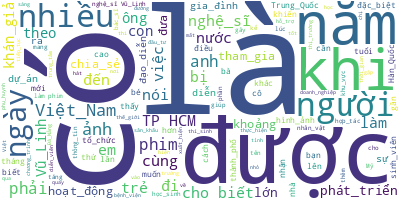

In [12]:
from wordcloud import WordCloud
import underthesea
long_string = ','.join(list(clustered_sentences[0]))
token_string = underthesea.word_tokenize(long_string)
wordcloud = WordCloud(background_color="white", max_words=200, contour_width=3, contour_color='steelblue')
wordcloud.generate(','.join(list(token_string)))# Visualize the word cloud
wordcloud.to_image()

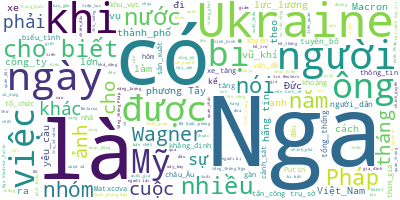

In [13]:
from wordcloud import WordCloud
import underthesea
long_string = ','.join(list(clustered_sentences[1]))
token_string = underthesea.word_tokenize(long_string)
wordcloud = WordCloud(background_color="white", max_words=200, contour_width=3, contour_color='steelblue')
wordcloud.generate(','.join(list(token_string)))# Visualize the word cloud
wordcloud.to_image()

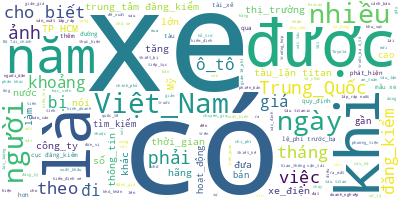

In [14]:
from wordcloud import WordCloud
import underthesea
long_string = ','.join(list(clustered_sentences[2]))
token_string = underthesea.word_tokenize(long_string)
wordcloud = WordCloud(background_color="white", max_words=200, contour_width=3, contour_color='steelblue')
wordcloud.generate(','.join(list(token_string)))# Visualize the word cloud
wordcloud.to_image()

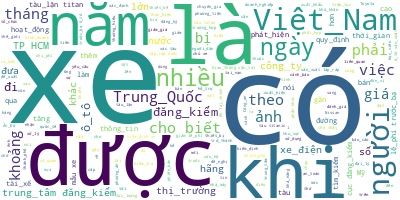

In [15]:
from wordcloud import WordCloud
import underthesea
long_string = ','.join(list(clustered_sentences[2]))
token_string = underthesea.word_tokenize(long_string)
wordcloud = WordCloud(background_color="white", max_words=200, contour_width=3, contour_color='steelblue')
wordcloud.generate(','.join(list(token_string)))# Visualize the word cloud
wordcloud.to_image()

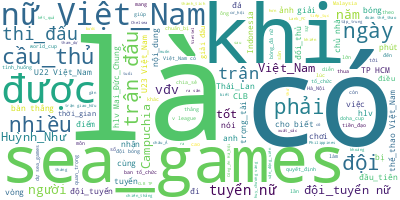

In [16]:
from wordcloud import WordCloud
import underthesea
long_string = ','.join(list(clustered_sentences[4]))
token_string = underthesea.word_tokenize(long_string)
wordcloud = WordCloud(background_color="white", max_words=200, contour_width=3, contour_color='steelblue')
wordcloud.generate(','.join(list(token_string)))# Visualize the word cloud
wordcloud.to_image()

In [17]:
from sklearn.datasets import fetch_20newsgroups

# Prepare documents
docs = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))['data']

In [34]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_model = CountVectorizer(min_df=5)
topic_model = BERTopic(vectorizer_model=vectorizer_model)
topics, probs = topic_model.fit_transform(sentences)

ValueError: max_df corresponds to < documents than min_df

In [33]:
topic_model.get_topic_info()[1:11]

,Topic,Count,Name,Representation,Representative_Docs
1,1,73,1_vitnam_seagames_bng_trn,"[vitnam, seagames, bng, trn, ththao, hlv, ituy...",[Teerasak tiền_đạo nguy_hiểm u22 Thái_Lan ảnh ...
